In [1]:
import matplotlib.pyplot as plt
import numpy as np
import twopoppy2
%matplotlib inline

au    = twopoppy2.au
year  = twopoppy2.year
M_sun = twopoppy2.M_sun
R_sun = twopoppy2.R_sun

In [2]:
ri   = np.logspace(-1, 3, 300) * au
grid = twopoppy2.Grid(ri)
m    = twopoppy2.Twopoppy(grid=grid)

m.M_star = M_sun
m.T_star = 4000
m.R_star = 2.5 * R_sun
rc = 10 * au
d2g = 0.01

In [3]:
m.sigma_g = 200 * (m.r / rc)**-1 * np.exp(-m.r / rc)
m.sigma_d = d2g * m.sigma_g
m.T_gas   = m.T_star * 0.05**0.25 * (m.r / m.R_star)**-0.5

(0.0001, 10000000.0)

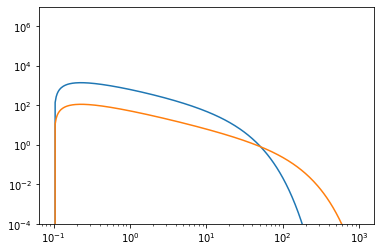

In [5]:
f, ax = plt.subplots()
ax.loglog(m.r / au, m.sigma_g)
for i in range(1000):
    m.evolve_gas(1000 * year)
ax.loglog(m.r / au, m.sigma_g)
ax.set_ylim(1e-4, 1e7)